# 앙상블 실습

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

mpl.rcParams['font.family'] = 'AppleGothic'

In [2]:
sklearn.__version__

'0.20.3'

## 유방암 데이터를 통한 Voting 예제

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data,
                         columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, # cancer_df.iloc[:,:-1] 혹은 cancer_df.drop('target',axis=1)
                                                    cancer.target, # cancer_df.target
                                                    test_size=0.3)

In [8]:
# VotingClassifier에 추가할 개별 학습 모델(분류기, estimator) 생성
svm_clf = SVC(gamma='scale')
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(solver='lbfgs',max_iter=10000)

In [9]:
# VotingClassifier 객체 생성
voting_clf = VotingClassifier([('Support Vector Machine',svm_clf),
                               ('Decision Tree Classifier',dt_clf),
                               ('Logistic Regression',lr_clf)],
                              voting='hard')

In [10]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Support Vector Machine', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('Decision Tree Classifier', Deci...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [11]:
voting_clf.score(X_test,y_test)

0.9707602339181286

In [12]:
# 각각 개별 분류기의 정확도 확인
for i,clf in enumerate(voting_clf.estimators_):
    print('\n')
    print('{:^30}'.format(voting_clf.estimators[i][0]))
    print()
    print('{:<5} : {}'.format('TRAIN',clf.score(X_train,y_train)))
    print('{:<5} : {}'.format('TEST',clf.score(X_test,y_test)))



    Support Vector Machine    

TRAIN : 0.9195979899497487
TEST  : 0.9181286549707602


   Decision Tree Classifier   

TRAIN : 1.0
TEST  : 0.9415204678362573


     Logistic Regression      

TRAIN : 0.9597989949748744
TEST  : 0.9590643274853801


---

## Bagging

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_clf = RandomForestClassifier(n_estimators=100) # scikit-learn 다음 버전을 위해서 param 추가

In [15]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rf_clf.score(X_test,y_test)

0.9532163742690059

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params = {'n_estimators':[100,300,500],
          'max_depth':[3,5,7],
          'n_jobs':[-1]}

In [19]:
grid_df = GridSearchCV(rf_clf,
                       param_grid=params,
                       cv = 5,
                       n_jobs=-1)

In [20]:
grid_df.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid_df.score(X_test,y_test)

0.9415204678362573

In [22]:
grid_df.best_params_

{'max_depth': 5, 'n_estimators': 500, 'n_jobs': -1}

In [23]:
X_train

array([[1.254e+01, 1.807e+01, 7.942e+01, ..., 1.635e-02, 2.233e-01,
        5.521e-02],
       [1.678e+01, 1.880e+01, 1.093e+02, ..., 1.474e-01, 2.810e-01,
        7.228e-02],
       [1.122e+01, 3.381e+01, 7.079e+01, ..., 3.002e-02, 2.911e-01,
        7.307e-02],
       ...,
       [1.927e+01, 2.647e+01, 1.279e+02, ..., 1.785e-01, 3.672e-01,
        1.123e-01],
       [1.500e+01, 1.551e+01, 9.745e+01, ..., 1.379e-01, 2.954e-01,
        8.362e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [24]:
f_imp = pd.DataFrame(grid_df.best_estimator_.feature_importances_,
                     index = cancer.feature_names,
                     columns=['importance'])
f_imp.T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
importance,0.038163,0.009985,0.057616,0.045519,0.005651,0.011747,0.052673,0.100919,0.003224,0.003725,...,0.122399,0.014711,0.116491,0.120007,0.011423,0.014078,0.034585,0.120191,0.007401,0.006968


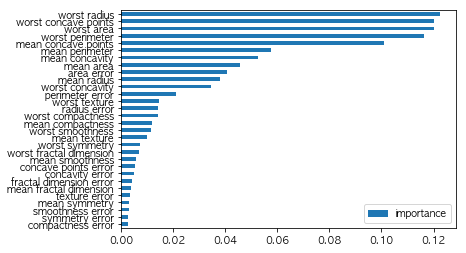

In [25]:
f_imp.sort_values(by='importance').plot(kind='barh')
plt.show()

---

## Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gbm_clf = GradientBoostingClassifier()

In [28]:
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [29]:
gbm_clf.score(X_test,y_test)

0.9532163742690059

In [30]:
gbm_parmas = {
    'n_estimators':[100,200],
    'learning_rate':[0.05,0.1]
}

In [31]:
grid_gbm = GridSearchCV(gbm_clf,
                        param_grid=gbm_parmas,
                        cv=5,
                        n_jobs=-1)

In [32]:
grid_gbm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid_gbm.score(X_test,y_test)

0.9707602339181286

## XGBoost

In [34]:
import xgboost

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb_clf = XGBClassifier()

In [37]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
xgb_clf.score(X_test,y_test)

0.9649122807017544

In [39]:
# 조기 중단 기능 (early stopping) 활용
eval_data = [(X_test,y_test)]
xgb_clf = XGBClassifier(n_estimators=500)
xgb_clf.fit(X_train,y_train,
            early_stopping_rounds= 100,
            eval_set = eval_data,
            eval_metric = 'logloss')

[0]	validation_0-logloss:0.615593
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.553036
[2]	validation_0-logloss:0.500498
[3]	validation_0-logloss:0.453844
[4]	validation_0-logloss:0.415334
[5]	validation_0-logloss:0.381626
[6]	validation_0-logloss:0.354083
[7]	validation_0-logloss:0.326348
[8]	validation_0-logloss:0.304611
[9]	validation_0-logloss:0.284143
[10]	validation_0-logloss:0.267726
[11]	validation_0-logloss:0.252263
[12]	validation_0-logloss:0.239003
[13]	validation_0-logloss:0.225695
[14]	validation_0-logloss:0.214112
[15]	validation_0-logloss:0.203558
[16]	validation_0-logloss:0.194984
[17]	validation_0-logloss:0.186837
[18]	validation_0-logloss:0.179552
[19]	validation_0-logloss:0.172228
[20]	validation_0-logloss:0.16536
[21]	validation_0-logloss:0.159196
[22]	validation_0-logloss:0.153946
[23]	validation_0-logloss:0.14869
[24]	validation_0-logloss:0.144637
[25]	validation_0-logloss:0.141697
[26]	validation_0-logloss:0.13893

[230]	validation_0-logloss:0.06704
[231]	validation_0-logloss:0.066928
[232]	validation_0-logloss:0.066729
[233]	validation_0-logloss:0.066932
[234]	validation_0-logloss:0.066685
[235]	validation_0-logloss:0.066727
[236]	validation_0-logloss:0.066824
[237]	validation_0-logloss:0.066735
[238]	validation_0-logloss:0.066669
[239]	validation_0-logloss:0.066866
[240]	validation_0-logloss:0.066625
[241]	validation_0-logloss:0.066539
[242]	validation_0-logloss:0.066399
[243]	validation_0-logloss:0.066496
[244]	validation_0-logloss:0.066305
[245]	validation_0-logloss:0.066331
[246]	validation_0-logloss:0.066228
[247]	validation_0-logloss:0.066147
[248]	validation_0-logloss:0.066084
[249]	validation_0-logloss:0.066278
[250]	validation_0-logloss:0.066048
[251]	validation_0-logloss:0.066238
[252]	validation_0-logloss:0.066051
[253]	validation_0-logloss:0.065917
[254]	validation_0-logloss:0.066012
[255]	validation_0-logloss:0.065933
[256]	validation_0-logloss:0.065804
[257]	validation_0-logloss:0.

[459]	validation_0-logloss:0.062029
[460]	validation_0-logloss:0.061918
[461]	validation_0-logloss:0.061769
[462]	validation_0-logloss:0.061785
[463]	validation_0-logloss:0.061896
[464]	validation_0-logloss:0.061787
[465]	validation_0-logloss:0.061864
[466]	validation_0-logloss:0.061757
[467]	validation_0-logloss:0.061834
[468]	validation_0-logloss:0.061728
[469]	validation_0-logloss:0.061837
[470]	validation_0-logloss:0.06174
[471]	validation_0-logloss:0.061749
[472]	validation_0-logloss:0.061826
[473]	validation_0-logloss:0.061722
[474]	validation_0-logloss:0.061799
[475]	validation_0-logloss:0.061696
[476]	validation_0-logloss:0.061807
[477]	validation_0-logloss:0.061823
[478]	validation_0-logloss:0.061728
[479]	validation_0-logloss:0.061627
[480]	validation_0-logloss:0.061703
[481]	validation_0-logloss:0.061812
[482]	validation_0-logloss:0.061709
[483]	validation_0-logloss:0.061649
[484]	validation_0-logloss:0.061659
[485]	validation_0-logloss:0.061734
[486]	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

## 각종 지표들

In [43]:
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import roc_auc_score # auc score
from sklearn.metrics import f1_score 

In [56]:
def get_clf_eval(y_test,y_pred):
    matrix = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    
    print('{}'.format('RESULT'))
    print('Confusion Matrix : ')
    print(matrix)
    print('-'*30)
    
    print('Accuaracy Score : ')
    print(accuracy)
    print('-'*30)
    
    print('Precision Score : ')
    print(precision)
    print('-'*30)
    
    print('Recall Score : ')
    print(recall)
    print('-'*30)
    
    print('F1 Score : ')
    print(f1)
    print('-'*30)
    
    print('AUC Score : ')
    print(auc)
    print('-'*30)

In [57]:
xgb_pred = xgb_clf.predict(X_test)

In [58]:
get_clf_eval(y_test,xgb_pred)

RESULT
Confusion Matrix : 
[[ 59   4]
 [  1 107]]
------------------------------
Accuaracy Score : 
0.9707602339181286
------------------------------
Precision Score : 
0.963963963963964
------------------------------
Recall Score : 
0.9907407407407407
------------------------------
F1 Score : 
0.9771689497716894
------------------------------
AUC Score : 
0.9636243386243386
------------------------------
